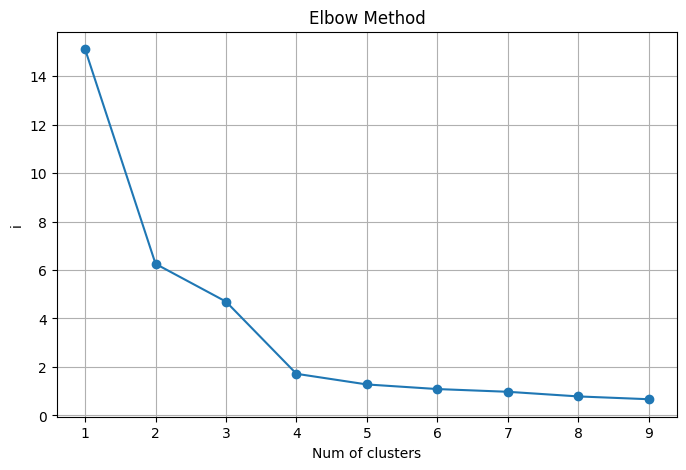

<ipython-input-7-e2ff6af7f887>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cluster'] = clusters


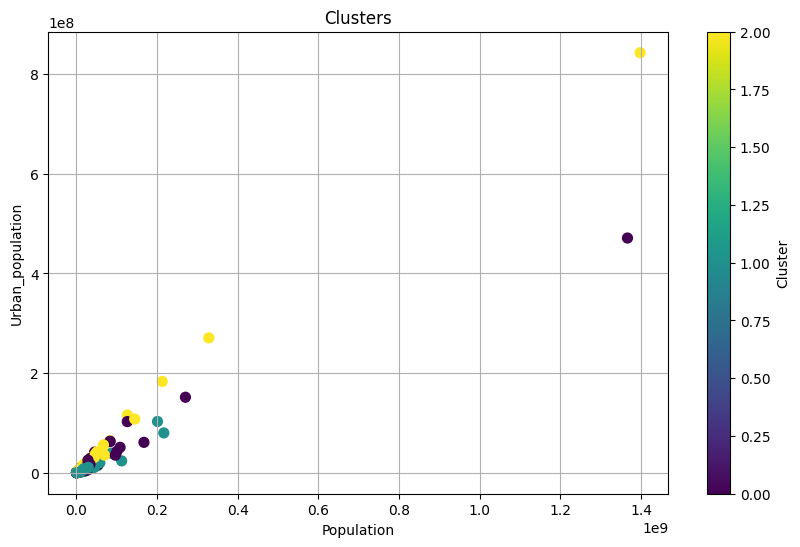

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

file_path = '/content/world-data-2023.csv'
data = pd.read_csv(file_path)

#Select the columns
selected_columns = ['Population', 'Urban_population', 'Birth Rate']  # Replace with exact names if needed
data_subset = data[selected_columns].copy()

#Remove the non letters
for col in data_subset.columns:
    data_subset[col] = pd.to_numeric(
        data_subset[col].astype(str).replace({',': '', '%': ''}, regex=True),
        errors='coerce'
    )

#remove missing values
data_cleaned = data_subset.dropna()

#use min max scaler for normalizing
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_cleaned)

i = []
k_values = range(1, 10)  # Test for k from 1 to 9
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    i.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, i, marker='o')
plt.title('Elbow Method')
plt.xlabel('Num of clusters')
plt.ylabel('i')
plt.grid(True)
plt.show()

# Apply K-Means with the chosen k (e.g., k=3 based on elbow plot)
optimal = 3
kmeans = KMeans(n_clusters=optimal, random_state=42)
clusters = kmeans.fit_predict(data_normalized)
data_cleaned['Cluster'] = clusters

#visualize clusters using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned.iloc[:, 0], data_cleaned.iloc[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Clusters')
plt.xlabel(selected_columns[0])
plt.ylabel(selected_columns[1])
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()